In [1]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')
OUT = "/content/drive/MyDrive/early_egypt"
os.makedirs(OUT, exist_ok=True)

Mounted at /content/drive


In [2]:
df_lemmas = pd.read_parquet('/content/drive/MyDrive/Древние языки/w2v_data/corpus_lemmatized_full.parquet')

In [3]:
df_lemmas

,text_id,sentence_id,lemmas,lemma_ids,surface_forms,flexion_codes,lemmas_text,surface_text
0,24GOH7CR5BD4VJQJ34JSLY4TB4,IBUBd7W2X7z40UeXqgSgPk3GHTM,"[_, _, _]","[850816, 850816, 850816]","[[⸮_?]mr, [⸮_?]ꜥnḫ, [⸮_?]ꜥf]","[3, 3, 3]",_ _ _,[⸮_?]mr [⸮_?]ꜥnḫ [⸮_?]ꜥf
1,24KH5LQ4WVEGXGMPCPIWSJTM2Q,IBUBd6uAV4yxPUQjusYh1VJWQ6A,"[pr.t, sw, 1...n]","[60300, 129460, 850814]","[⸢pr,t⸣, sw, 2⸢6⸣]","[3, 3, 3]",pr.t sw 1...n,"⸢pr,t⸣ sw 2⸢6⸣"
2,24KH5LQ4WVEGXGMPCPIWSJTM2Q,IBUBdzZGcx36VkQBntNQsNvOpO8,"[wḏb-rd, n, ḥm-nṯr]","[52630, 400055, 104940]","[⸢wḏb⸣[-rd], n, ḥm-nṯr]","[3, 3, 3]",wḏb-rd n ḥm-nṯr,⸢wḏb⸣[-rd] n ḥm-nṯr
3,24KH5LQ4WVEGXGMPCPIWSJTM2Q,IBUBdxdAzFFElEGxvNq7pPJ4ilA,"[ḫpš, 1...n, Wr-kꜣ]","[116430, 850814, 450130]","[ḫpš, 1, Wr-kꜣ]","[3, 3, 3]",ḫpš 1...n Wr-kꜣ,ḫpš 1 Wr-kꜣ
4,24KH5LQ4WVEGXGMPCPIWSJTM2Q,IBUBd4ItkqWjokHakIppy7jw8Yc,"[tp, n.j, ḫpš, 1...n, zꜣb-ꜥḏ-mr, Ṯy]","[450189, 79800, 116430, 850814, 401115, 450176]","[tp, n,j, ḫpš, 1, zꜣb-ꜥḏ-mr, Ṯy]","[3, 3, 3, 3, 3, 3]",tp n.j ḫpš 1...n zꜣb-ꜥḏ-mr Ṯy,"tp n,j ḫpš 1 zꜣb-ꜥḏ-mr Ṯy"
...,...,...,...,...,...,...,...,...
28842,ZWFKSQHOLJGQXJTXOIQXJ6OCHI,IBUBd8wUNtmv0EWPjuEewLwFi5s,"[zẖꜣ.w, Nb-m-ht]","[550055, 401176]","[zẖꜣw, Nb-m-ht]","[3, 3]",zẖꜣ.w Nb-m-ht,zẖꜣw Nb-m-ht
28843,ZWHUNRG7ARHGHH5EOY4PXZ43FU,IBUBd8r8tKX6bkpnmW6eUt88bY8,"[šps.w-nswt, jm.j-rʾ-jꜥꜣ.w, Ḥꜥꜣ]","[400432, 400011, 713452]","[šps-nsw,t, jm.j-rʾ-jꜥꜣw, Ḥꜥꜣw]","[3, 3, 3]",šps.w-nswt jm.j-rʾ-jꜥꜣ.w Ḥꜥꜣ,"šps-nsw,t jm.j-rʾ-jꜥꜣw Ḥꜥꜣw"
28844,ZX2HIGXB5ZF3PEAOCTFZLAIO3Y,IBUBd0t4Y9hv40cWnRpIBYWXpWc,"[rḏi̯, nswt, m, ḥtp, rḏi̯, Jnp.w, m, ḥtp, nfr....","[96700, 88040, 64362, 400524, 96700, 27360, 64...","[(rḏj), nsw,t, m, ḥtp, 〈rḏj〉, I͗npw, m, ḥtp, n...","[10020, 3, 3, 3, 10020, 3, 3, 3, 0, 0, 0, 0, 3...",rḏi̯ nswt m ḥtp rḏi̯ Jnp.w m ḥtp nfr.w jr.j-jḫ...,"(rḏj) nsw,t m ḥtp 〈rḏj〉 I͗npw m ḥtp nfr jrj-jḫ..."
28845,ZX2HIGXB5ZF3PEAOCTFZLAIO3Y,IBUBdW6MtupE1kUtiaSZsh3Z6lc,"[ḥm.t, =f, mri̯, =f]","[104730, 10050, 72470, 10050]","[ḥm,t, =f, mrt, =f]","[70054, 3, 40084, 3]",ḥm.t =f mri̯ =f,"ḥm,t =f mrt =f"


In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.models

model = gensim.models.Word2Vec.load('/content/drive/MyDrive/Древние языки/w2v_experiments/word2vec_baseline_thes_only.model')

def build_wsd_dataframe(corpus_df, target_lemma='sḏm', model=model, window_size=2):

    all_occurrences = []

    print(f"{target_lemma}")

    for idx, row in corpus_df.iterrows():
        lemmas = row['lemmas']
        lemma_ids = row['lemma_ids']

        target_positions = [i for i, lemma in enumerate(lemmas) if lemma == target_lemma]

        for pos in target_positions:
            current_lemma_id = str(lemma_ids[pos])


            sense_mapping = {
                '150560': '150560',  # to hear
                '150570': '150570',  # questioning
                '150590': '150590'   # servant
            }
            sense_id = sense_mapping.get(current_lemma_id, 'UNKNOWN')

            left_bound = max(0, pos - window_size)
            right_bound = min(len(lemmas), pos + window_size + 1)

            context_lemmas = lemmas[left_bound:right_bound]
            context_ids = lemma_ids[left_bound:right_bound]

            target_pos_in_context = pos - left_bound

            no_target_lemmas = list(context_lemmas[:target_pos_in_context]) + list(context_lemmas[target_pos_in_context+1:])
            no_target_ids = list(context_ids[:target_pos_in_context]) + list(context_ids[target_pos_in_context+1:])

            occurrence = {
                'text_id': row.get('text_id', ''),
                'sentence_id': row.get('sentence_id', ''),
                'lemmas_str': ' '.join(lemmas),
                'lemmas_list': lemmas,
                'target_lemma': target_lemma,
                'target_pos_original': pos,
                'target_pos': [target_pos_in_context],
                'no_target': no_target_lemmas,
                'no_target_ids': no_target_ids,
                'sense_ids': sense_id,
                'lemma_id': current_lemma_id,
                'surface_text': row.get('surface_text', '')[:200],
                'corpusPrefix': row.get('corpusPrefix', '')
            }

            if 'all_translations' in row:
                occurrence['translation'] = row['all_translations']
            elif 'translation' in row:
                occurrence['translation'] = row['translation']

            all_occurrences.append(occurrence)

    wsd_df = pd.DataFrame(all_occurrences)

    print(f"{len(wsd_df)} употреблений леммы ")
    print("Распределение по sense_ids:")
    print(wsd_df['sense_ids'].value_counts())

    return wsd_df

wsd_df_raw = build_wsd_dataframe(df_lemmas, target_lemma='sḏm')

sḏm
134 употреблений леммы 
Распределение по sense_ids:
sense_ids
150560    131
150570      3
Name: count, dtype: int64


In [9]:
def add_tfidf_and_embeddings(wsd_df, model):

    all_model_words = list(model.wv.key_to_index.keys())
    corpus_sentences = [' '.join(row['lemmas_list']) for _, row in wsd_df.iterrows()]

    vectorizer = TfidfVectorizer(
        vocabulary=all_model_words,
        lowercase=False,
        tokenizer=lambda x: x.split(),
        use_idf=True
    )

    X_tfidf = vectorizer.fit_transform(corpus_sentences)

    wsd_df['tfidf_full'] = list(X_tfidf.toarray())

    def get_weighted_context_embedding(no_target_lemmas, no_target_ids, tfidf_vector, model):
        vectors = []
        weights = []

        vocab = vectorizer.vocabulary_

        for i, lemma in enumerate(no_target_lemmas):
            if lemma in model.wv.key_to_index:

                vectors.append(model.wv[lemma])

                if lemma in vocab:
                    weight = tfidf_vector[vocab[lemma]]
                else:
                    weight = 0.0
                weights.append(weight)
            else:

                continue

        if vectors:
            vectors = np.array(vectors)
            weights = np.array(weights)

            if weights.sum() == 0:
                embedding = np.mean(vectors, axis=0)
            else:
                weights = weights / weights.sum()
                embedding = np.average(vectors, axis=0, weights=weights)

            return embedding
        else:
            return np.zeros(model.vector_size)

    embeddings = []

    for idx, row in wsd_df.iterrows():
        embedding = get_weighted_context_embedding(
            row['no_target'],
            row['no_target_ids'],
            row['tfidf_full'],
            model
        )
        embeddings.append(embedding)

    wsd_df['embedding'] = embeddings

    wsd_df = wsd_df.dropna(subset=['embedding'])

    return wsd_df

wsd_df_final = add_tfidf_and_embeddings(wsd_df_raw, model)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
final_df = wsd_df_final.copy()

PCA


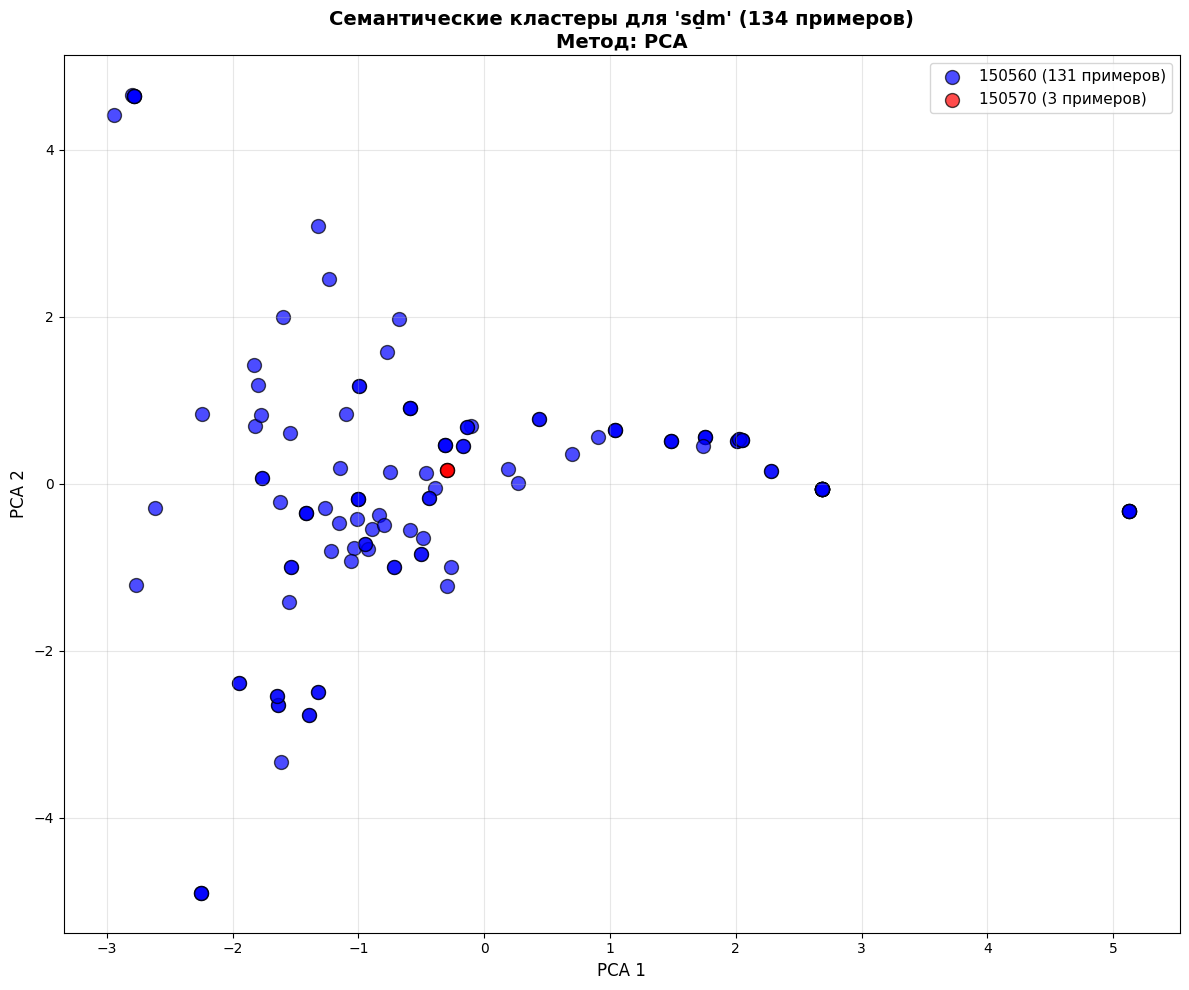

t-SNE
Используется perplexity=13 для t-SNE


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



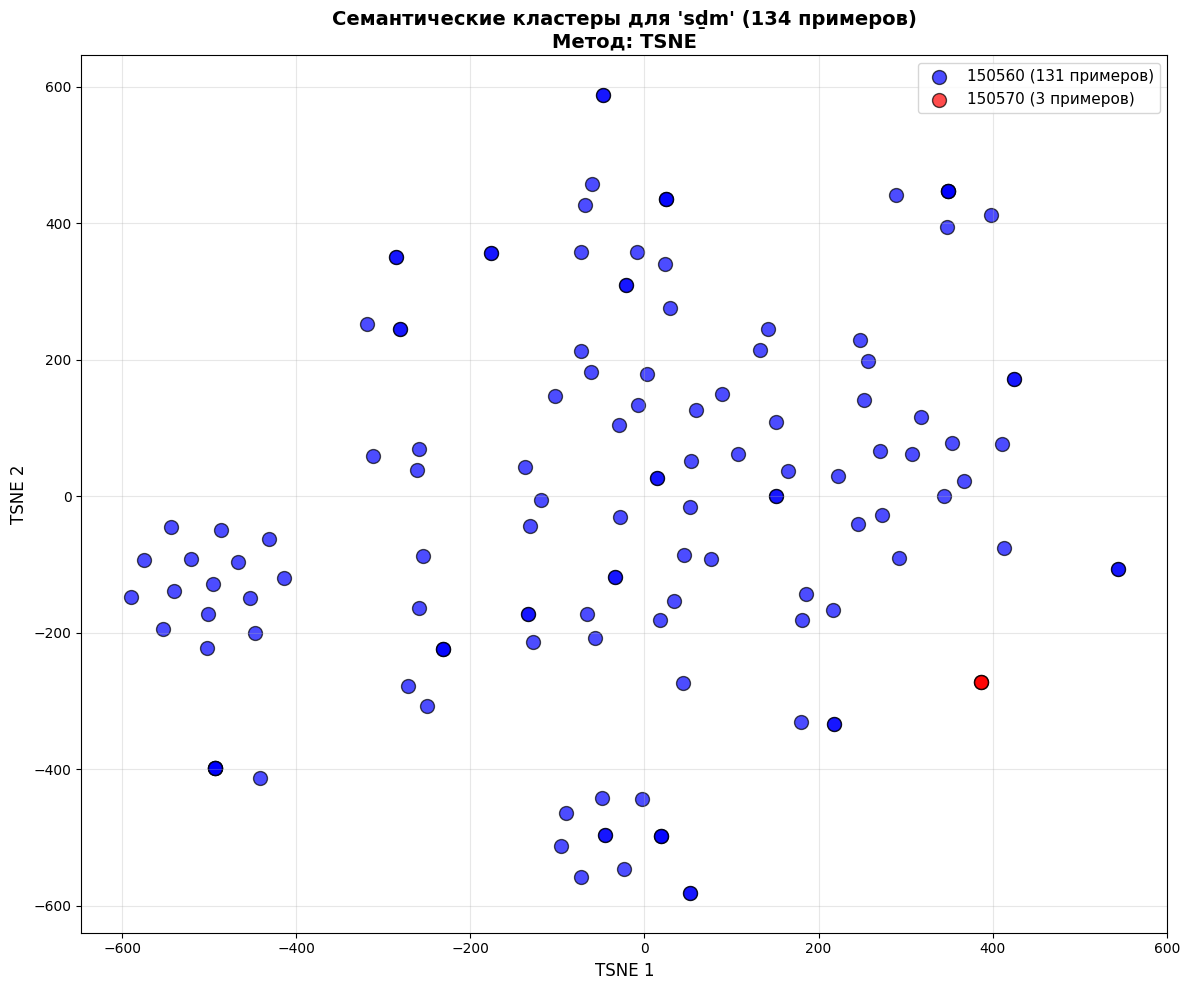

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
from matplotlib import pyplot as plt

def make_plot(df, word, reducer, dimensions=2):
    title = f"Семантические кластеры для '{word}' ({len(df)} примеров)"
    labels_true = df['sense_ids'].apply(str).to_numpy()

    embeddings = np.stack(df['embedding'].to_numpy())

    if reducer == 'pca':
        reducer_model = PCA(n_components=dimensions, random_state=42)
    elif reducer == 'tsne':
        n_samples = len(df)
        perplexity_value = min(30, max(5, n_samples // 10))
        print(f"Используется perplexity={perplexity_value} для t-SNE")
        reducer_model = TSNE(
            n_components=dimensions,
            random_state=42,
            perplexity=perplexity_value,
            learning_rate=200,
            n_iter=1000
        )

    dn = reducer_model.fit_transform(embeddings)

    if dimensions == 2:
        fig_plotly = px.scatter(
            x=dn[:, 0],
            y=dn[:, 1],
            color=labels_true,
            title=f"{title} ({reducer.upper()})",
            labels={'x': f'{reducer.upper()} 1', 'y': f'{reducer.upper()} 2'},
            hover_data={
                'sense_id': labels_true,
                'text': df['lemmas_str'] if 'lemmas_str' in df.columns else None
            },
            color_discrete_map={
                '150560': 'blue',
                '150570': 'red',
                '150590': 'green'
            }
        )

        fig_plotly.update_traces(marker=dict(size=10, opacity=0.8))
        fig_plotly.update_layout(showlegend=True)
        fig_plotly.show()

        plt.figure(figsize=(12, 10))

        colors = {'150560': 'blue', '150570': 'red', '150590': 'green'}

        for sense_id in df['sense_ids'].unique():
            mask = df['sense_ids'] == sense_id
            color = colors.get(str(sense_id), 'gray')
            label = f"{sense_id} ({sum(mask)} примеров)"

            plt.scatter(
                dn[mask, 0],
                dn[mask, 1],
                c=color,
                label=label,
                s=100,
                alpha=0.7,
                edgecolors='black',
                linewidth=1
            )

        plt.title(f"{title}\nМетод: {reducer.upper()}", fontsize=14, fontweight='bold')
        plt.xlabel(f"{reducer.upper()} 1", fontsize=12)
        plt.ylabel(f"{reducer.upper()} 2", fontsize=12)
        plt.legend(loc='best', fontsize=11)
        plt.grid(True, alpha=0.3)

        if 150570 in df['sense_ids'].values:
            rare_mask = df['sense_ids'] == 150570
            for i, (x, y) in enumerate(zip(dn[rare_mask, 0], dn[rare_mask, 1])):
                plt.annotate(
                    f"150570-{i+1}",
                    (x, y),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=9,
                    fontweight='bold',
                    color='red'
                )

        plt.tight_layout()
        plt.show()



print("PCA")
make_plot(final_df, 'sḏm', 'pca', dimensions=2)

print("t-SNE")
make_plot(final_df, 'sḏm', 'tsne', dimensions=2)

In [ ]:
results_df

,model,samples,KMeans_ARI,KMeans_Silhouette,Agglo_ARI,Agglo_Silhouette,Avg_ARI,Avg_Silhouette,model_type,thes_only
0,word2vec_baseline,133,-0.020,0.216,-0.017,0.214,-0.019,0.215,Word2Vec,False
1,word2vec_vec50,133,-0.022,0.219,-0.018,0.222,-0.020,0.220,Word2Vec,False
2,word2vec_vec200,133,0.011,0.209,-0.017,0.212,-0.003,0.210,Word2Vec,False
3,word2vec_vec300,133,-0.019,0.192,-0.020,0.200,-0.019,0.196,Word2Vec,False
4,word2vec_win3,133,-0.010,0.224,-0.026,0.197,-0.018,0.210,Word2Vec,False
5,word2vec_win10,133,-0.023,0.219,-0.016,0.216,-0.019,0.218,Word2Vec,False
6,word2vec_mincount3,133,-0.020,0.219,-0.017,0.217,-0.019,0.218,Word2Vec,False
7,word2vec_mincount10,133,-0.020,0.214,-0.020,0.211,-0.020,0.212,Word2Vec,False
8,word2vec_skipgram,133,-0.004,0.207,-0.011,0.194,-0.007,0.201,Word2Vec,False
9,word2vec_epochs50,133,-0.006,0.198,-0.020,0.191,-0.013,0.194,Word2Vec,False


In [ ]:
model.wv.most_similar(positive=['mw.t', 'zꜣ'], negative=['jtj'])

model.wv.most_similar(positive=['Wsjr', 'ḥm.t'], negative=['nṯr'])

[('ḥm.t-nṯr-Ḥw.t-Ḥr.w-nb.t-Nh.t', 0.6343080997467041),
 ('Ḥntj', 0.6327986717224121),
 ('ẖkr.t-nswt-wꜥ.tjt', 0.6274227499961853),
 ('jmꜣḫ.wt-ḫr-nṯr-ꜥꜣ-nb-p.t', 0.6172551512718201),
 ('mr.yt', 0.6164062023162842),
 ('jmꜣḫ.wt-ḫr-hj=s', 0.6152260899543762),
 ('wrš.t-Mnw', 0.6146465539932251),
 ('Nb.t', 0.6104638576507568),
 ('ḥm.t-nṯr-Ḥw.t-Ḥr.w', 0.609643816947937),
 ('Nb.t-jtj=f', 0.6081302165985107)]